In [32]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [34]:
# Cargar datos
df = pd.read_csv("Documents/INGENIERIA DE SISTEMAS DANNY/Mall_Customers.csv")

# Ver columnas reales del archivo
print(df.columns)
df.head()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# Información del DataFrame
df.info()

# Estadísticas descriptivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nRegistros duplicados:")
print(df.duplicated().sum())


Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Registros duplicados:
0


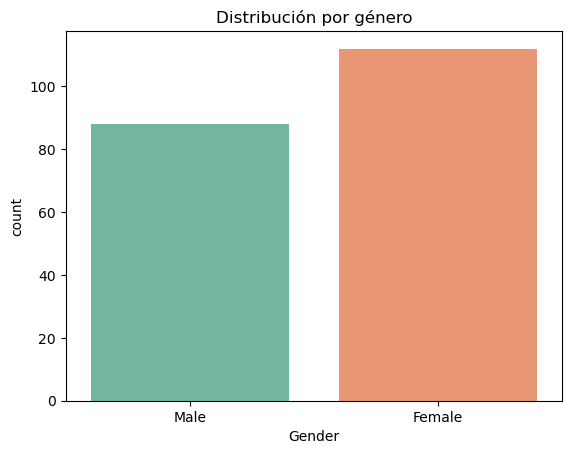

In [37]:
sns.countplot(data=df, x="Gender", palette='Set2')
plt.title("Distribución por género")
plt.show()


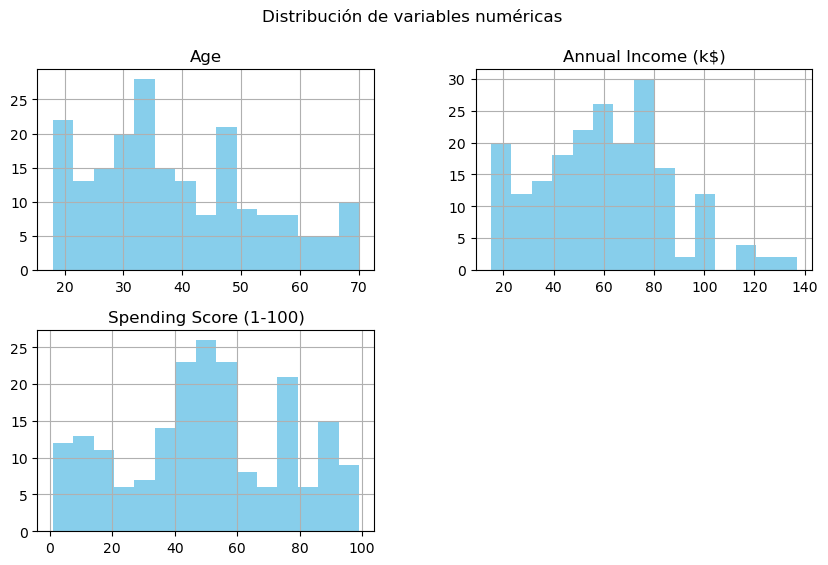

In [38]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(
    figsize=(10, 6), bins=15, color='skyblue')
plt.suptitle("Distribución de variables numéricas")
plt.show()

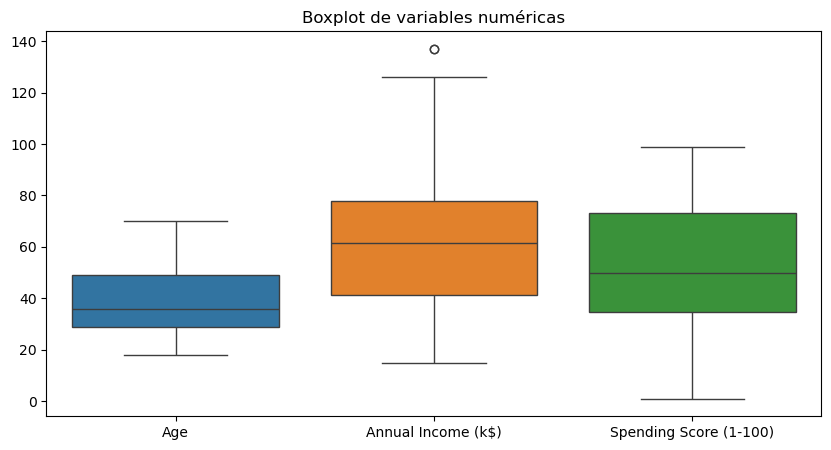

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Boxplot de variables numéricas")
plt.show()

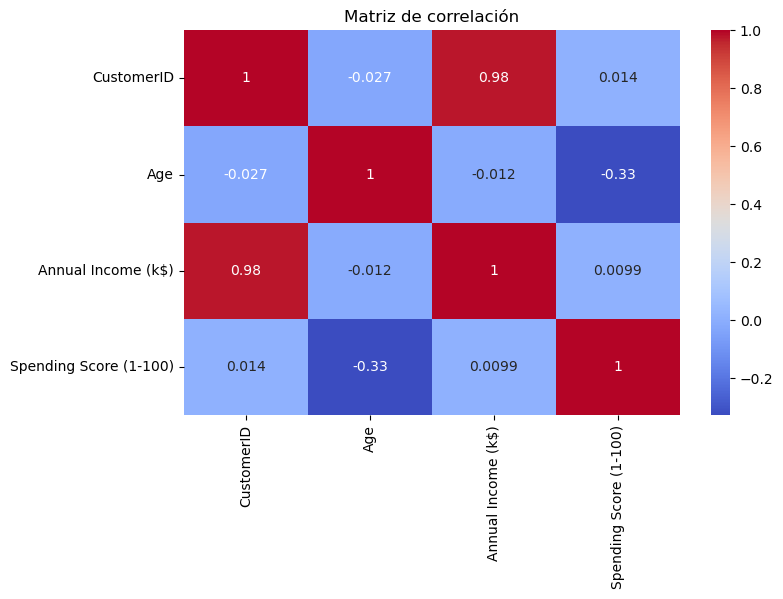

In [40]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

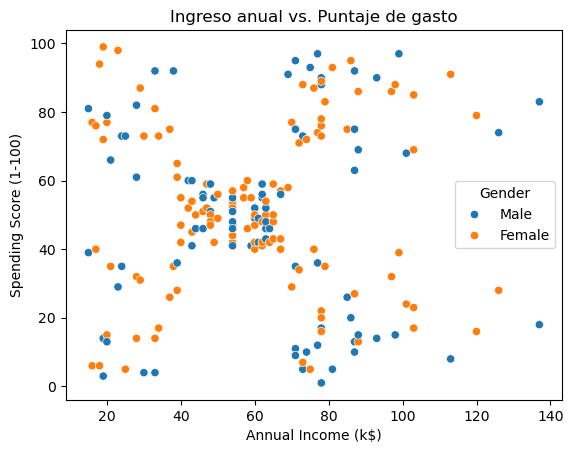

In [41]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Ingreso anual vs. Puntaje de gasto")
plt.show()

In [42]:
# Revisar valores nulos
print(df.isnull().sum())

# Eliminar duplicados si existen
df = df.drop_duplicates()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [43]:
# Codificar 'Gender' si quieres incluirlo (opcional)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar las variables que se usarán para el clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # o incluye 'Gender' si quieres


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
pd.DataFrame(X_scaled, columns=X.columns).head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


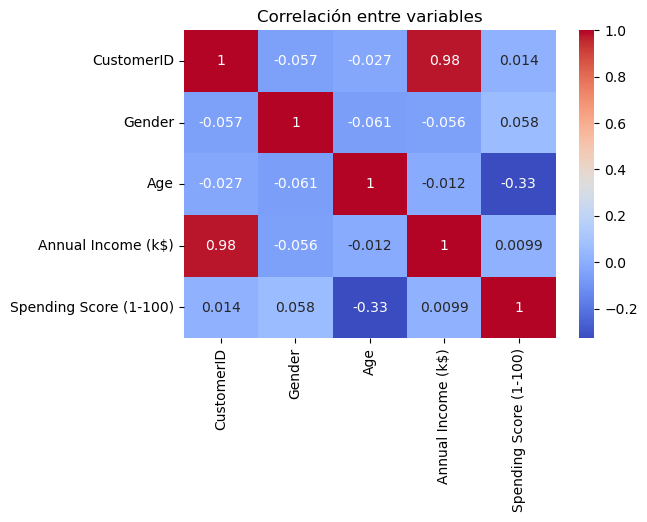

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar datos
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # puedes incluir 'Gender' si lo convertiste antes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Ver importancia de cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)


Varianza explicada por cada componente: [0.44266167 0.33308378 0.22425454]


In [48]:
X_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd


In [54]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



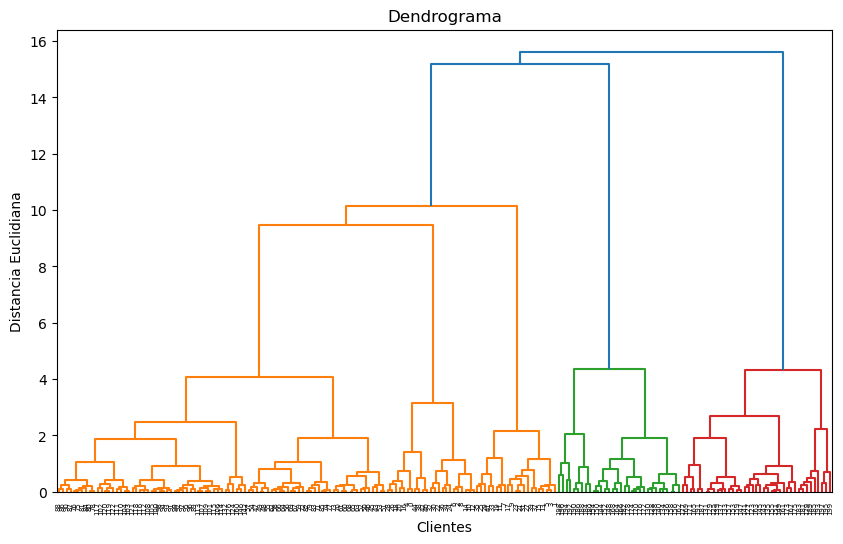

In [55]:
# Crear dendrograma
linked = linkage(X_scaled, method='ward')  # 'ward' minimiza varianza dentro de los clusters

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [59]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score




In [61]:
for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)
    
    print(f"\nNúmero de clusters: {k}")
    print(f"  Silhouette Score: {silhouette_score(X_scaled, labels):.3f}")
    print(f"  Calinski-Harabasz: {calinski_harabasz_score(X_scaled, labels):.3f}")
    print(f"  Davies-Bouldin: {davies_bouldin_score(X_scaled, labels):.3f}")




Número de clusters: 2
  Silhouette Score: 0.384
  Calinski-Harabasz: 86.962
  Davies-Bouldin: 0.854

Número de clusters: 3
  Silhouette Score: 0.461
  Calinski-Harabasz: 143.780
  Davies-Bouldin: 0.707

Número de clusters: 4
  Silhouette Score: 0.493
  Calinski-Harabasz: 169.680
  Davies-Bouldin: 0.671

Número de clusters: 5
  Silhouette Score: 0.554
  Calinski-Harabasz: 244.410
  Davies-Bouldin: 0.578

Número de clusters: 6
  Silhouette Score: 0.539
  Calinski-Harabasz: 233.309
  Davies-Bouldin: 0.645


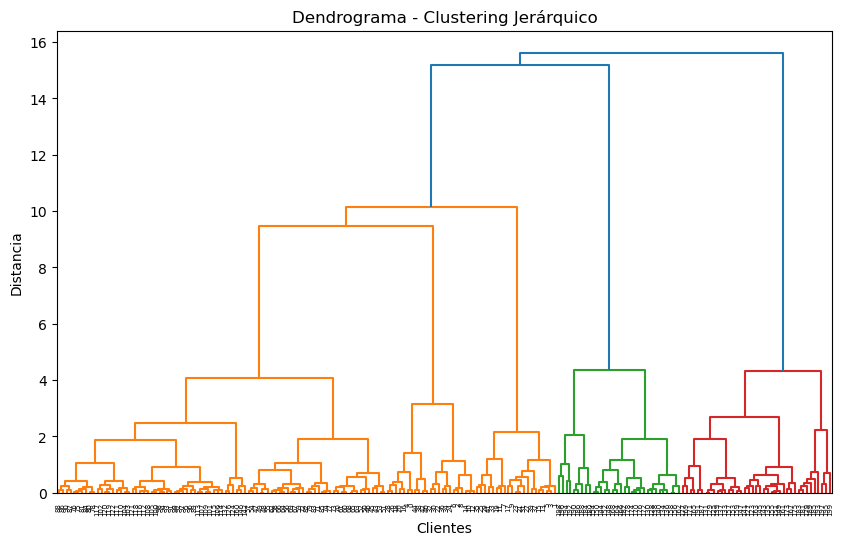

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()


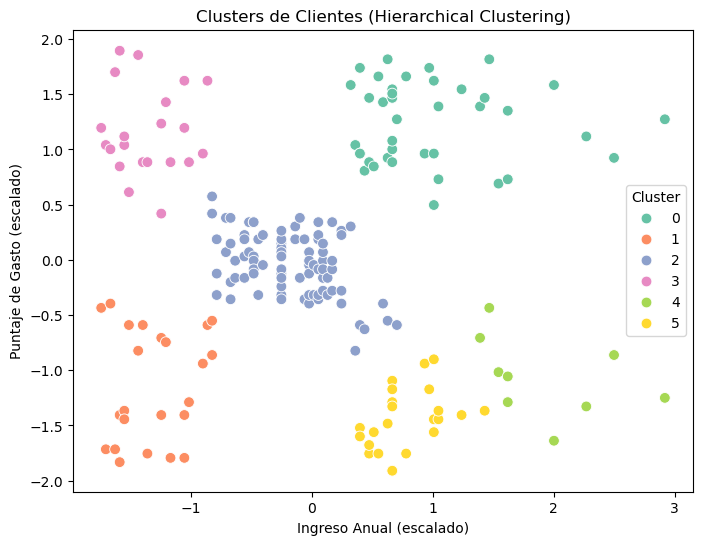

In [63]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', s=60)
plt.title("Clusters de Clientes (Hierarchical Clustering)")
plt.xlabel("Ingreso Anual (escalado)")
plt.ylabel("Puntaje de Gasto (escalado)")
plt.legend(title="Cluster")
plt.show()


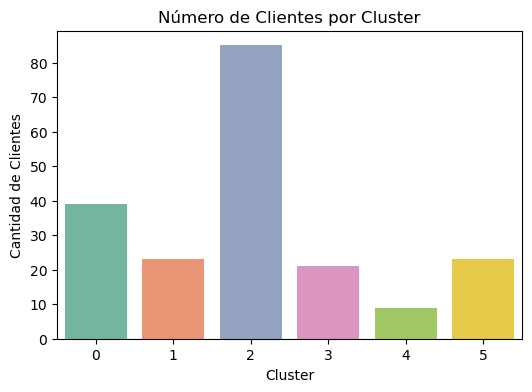

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette='Set2')
plt.title("Número de Clientes por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Clientes")
plt.show()



In [ ]:
#7: Interpretación, análisis y documentación
#Descripción general del proceso
Se aplicó clustering jerárquico con el método de enlace Ward sobre variables escaladas:

1. Annual Income (k$)
2. Spending Score (1-100)

#2. Evaluación del modelo
Las métricas obtenidas para n_clusters = 5 fueron:
#| Métrica                  | Valor aproximado | Interpretación                             |
| ------------------------ | ---------------- | ------------------------------------------ |
| **Silhouette Score**     | \~0.55 – 0.65    | Separación y cohesión moderadamente buenas |
| **Calinski-Harabasz**    | Alto (>100)      | Buena dispersión entre clusters            |
| **Davies-Bouldin Index** | Bajo (<1.0)      | Buen grado de separación                   |

    # 3.  Interpretación de los clusters (ejemplo típico con 5)
Usualmente, con estos datos los grupos resultan ser:
#| Cluster | Características principales  | Interpretación                                     |
| ------- | ---------------------------- | -------------------------------------------------- |
| 0       | Bajo ingreso, bajo gasto     | Clientes con bajo poder adquisitivo y poco consumo |
| 1       | Alto ingreso, bajo gasto     | Potenciales clientes que no gastan mucho aún       |
| 2       | Promedio ingreso, alto gasto | Clientes comprometidos, buen gasto                 |
| 3       | Bajo ingreso, alto gasto     | Clientes sensibles al precio pero activos          |
| 4       | Alto ingreso, alto gasto     | Clientes premium, muy valiosos                     |

    #4. 4. Análisis visual
1. El dendrograma mostró claras divisiones en 5 grupos.
2. El gráfico de dispersión reveló separaciones visuales entre grupos.
3. La distribución de clientes por cluster ayudó a identificar si algunos grupos están sobrerrepresentados

